# Exploratory Data Analysis and Modeling

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..')) 
if project_root not in sys.path:
    sys.path.append(project_root)

from src.utils import load_data


In [13]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import load_data

# Load the dataset
df = load_data('../data/raw/clean_data_after_eda.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

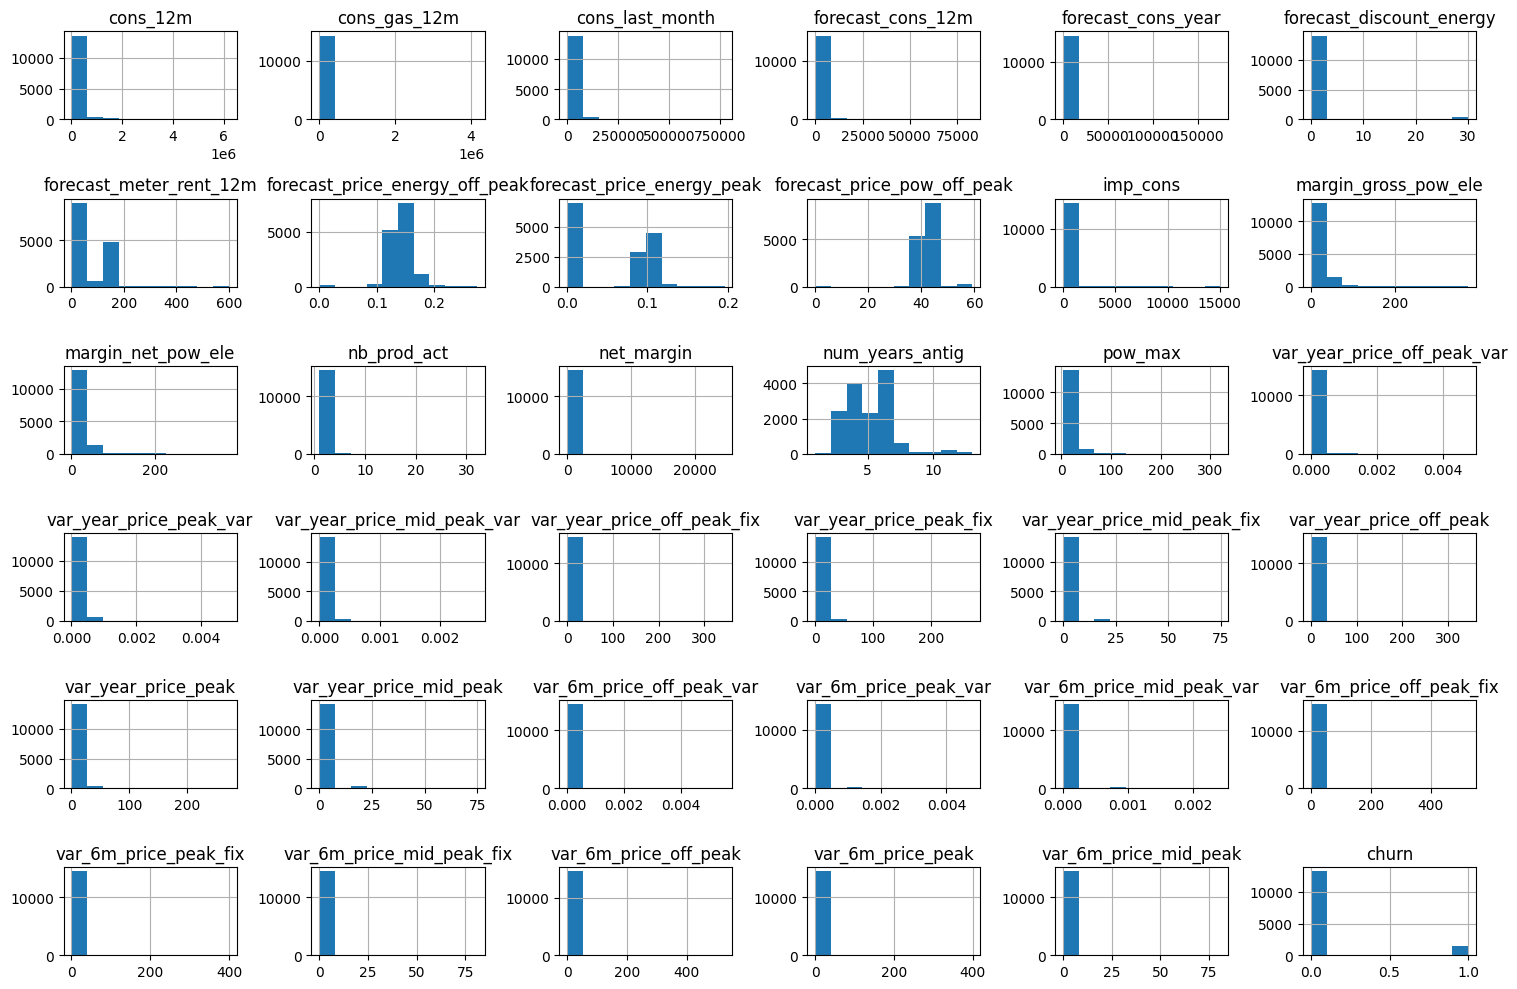

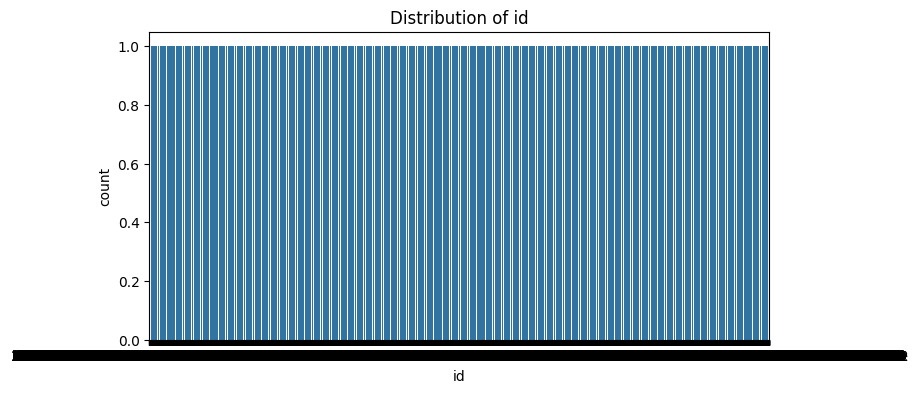

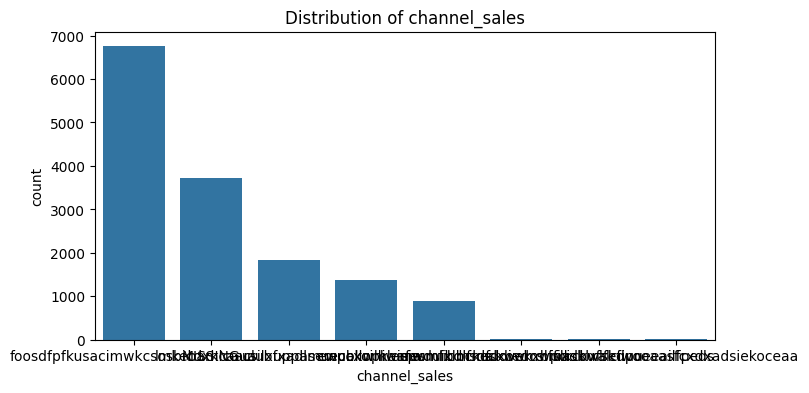

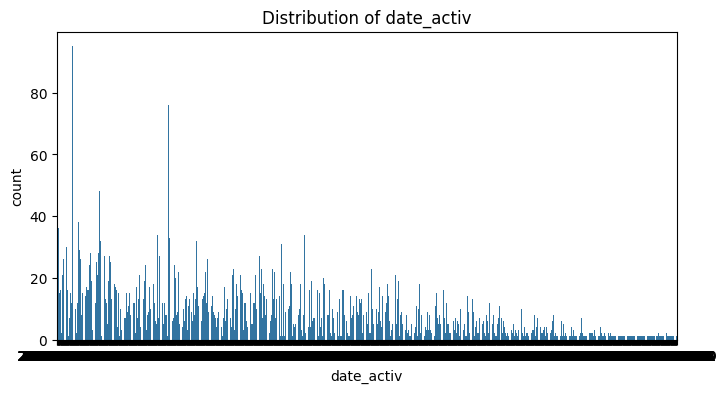

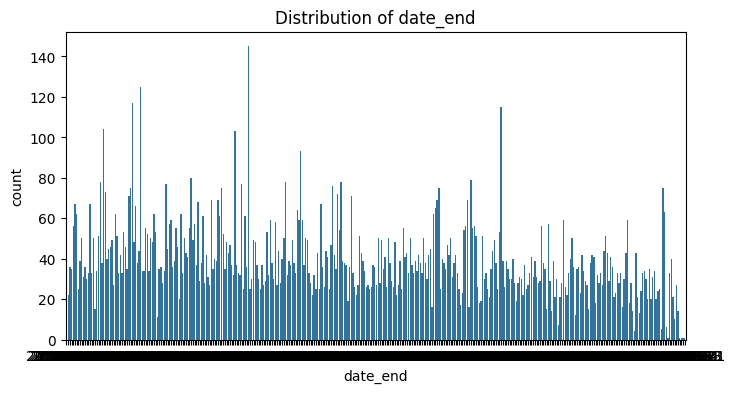

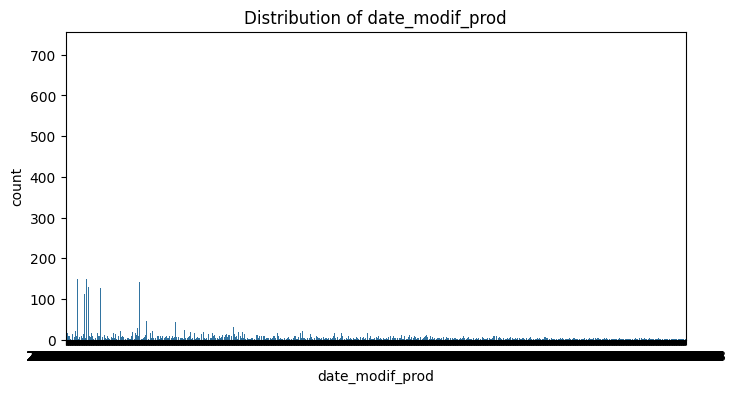

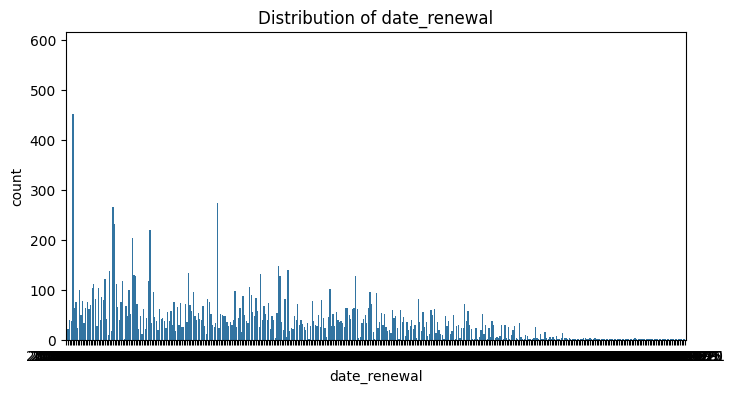

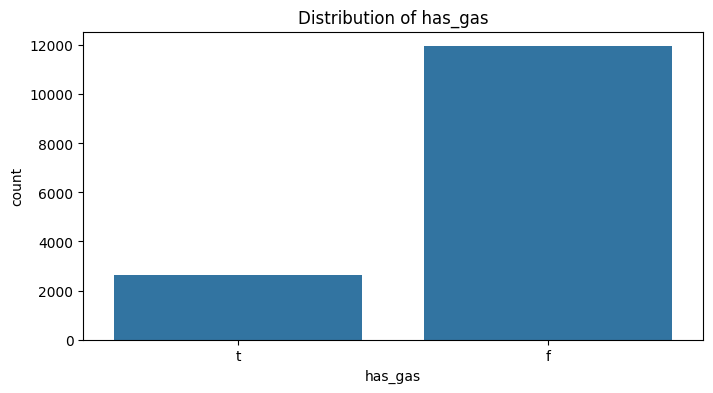

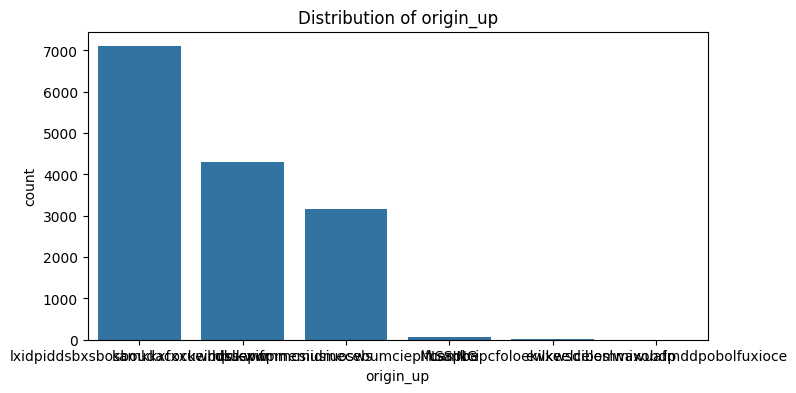

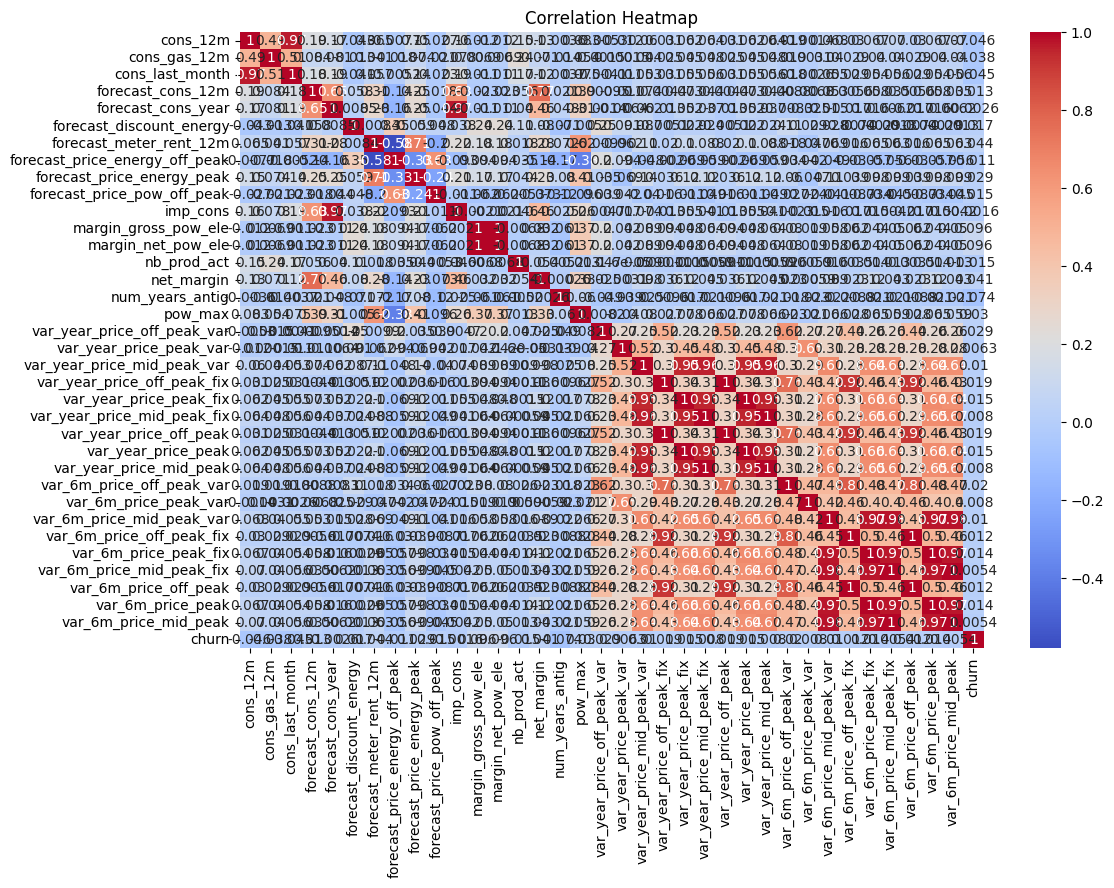

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic info
print(df.info())
print(df.describe())
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Visualize distributions for numerical features
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Visualize categorical features
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Feature scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Pastikan target churn tersedia dan valid
print("Tipe data churn:", df['churn'].dtype)
print("Nilai unik churn:", df['churn'].unique())

# --- Pembersihan variabel target ---
y = df['churn']

# Case A: kalau churn berupa 'Yes'/'No'
if y.dtype == 'object':
    y = y.str.strip()  # hilangkan spasi kalau ada
    y = y.map({'Yes': 1, 'No': 0})  # ubah ke 1/0

# Case B: kalau churn berupa float (0.0, 1.0), ubah ke int
elif y.dtype == 'float':
    y = y.astype(int)

# Hapus data yang churn-nya kosong (NaN)
X = df.drop('churn', axis=1)
X = X[y.notna()]
y = y.dropna()

# --- Train Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Training ---
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# --- Prediction dan Evaluasi ---
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Tipe data churn: float64
Nilai unik churn: [ 3.04846916 -0.3280335 ]
Confusion Matrix:
 [[2615    2]
 [ 289   16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           3       0.89      0.05      0.10       305

    accuracy                           0.90      2922
   macro avg       0.89      0.53      0.52      2922
weighted avg       0.90      0.90      0.86      2922

Accuracy: 0.9004106776180698
